# Ejercicio1
### (Usar GroupBy)

### 1: Devolver la edad promedio de los que sobrevivieron y los que no 

In [3]:
#importamos el archivo
import pandas as pd
df= pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
prom =df.groupby('Survived')['Age'].mean()
prom = prom.rename (index={0:'Fallecidos',1:'Supervivientes'})
prom

Survived
Fallecidos        30.626179
Supervivientes    28.343690
Name: Age, dtype: float64

### 2: Edad máxima, edad mínima, de los que sobrevivieron y los que no 

In [41]:
min=df.groupby('Survived')['Age'].min()
max=df.groupby('Survived')['Age'].max()
dtf=pd.DataFrame([min,max], index=["Edad mínima", "Edad máxima"])
dtf = dtf.rename(columns={0: "Fallecidos", 1: "Supervivientes"})
dtf

Survived,Fallecidos,Supervivientes
Edad mínima,1.0,0.42
Edad máxima,74.0,80.00


### 3: Edad promedio por clase de los que sobrevivieron y los que no

In [58]:
prom_class = df[['Pclass','Survived','Age']].groupby(['Pclass','Survived']).mean()
prom_class = prom_class.rename(index={0: "Fallecidos", 1: "Supervivientes"},level='Survived')
prom_class

Age
Pclass Survived                 
1      Fallecidos      43.695312
       Supervivientes  35.368197
2      Fallecidos      33.544444
       Supervivientes  25.901566
3      Fallecidos      26.555556
       Supervivientes  20.646118

# Ejercicio 2

### 1: Del dataframe del titanic, calcular el promedio de edad de los que sobrevivieron y los que no, hacer un gráfico de barras que sea representativo. 


<Axes: xlabel='Survived'>

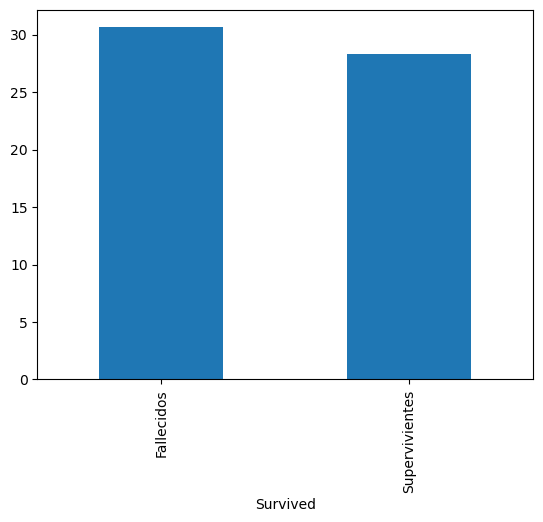

In [67]:
prom.plot.bar()

### 2: Hacer un gráfico del tipo histograma que represente la frecuencia de edades únicamente de las  mujeres que sobrevivieron. 

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
874    28.0
875    15.0
879    56.0
880    25.0
887    19.0
Name: Age, Length: 233, dtype: float64


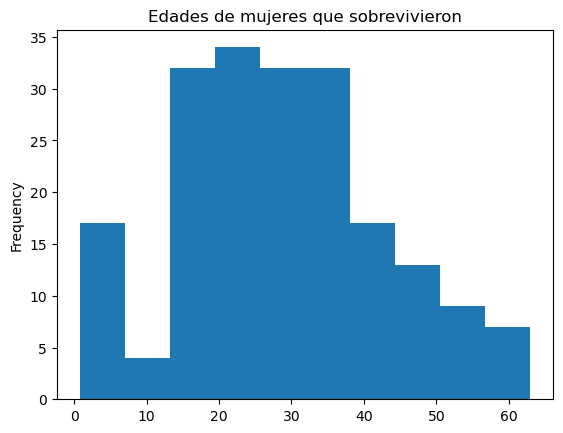

In [98]:
filtro = df[(df['Sex']=='female')&(df['Survived']==1)]
filtro
frecuencia = filtro['Age']
print(frecuencia)
hist = frecuencia.plot.hist(title ='Edades de mujeres que sobrevivieron')

Age
24.00    14
22.00    10
30.00     9
35.00     8
18.00     8
36.00     7
19.00     7
33.00     6
29.00     5
27.00     5
31.00     5
40.00     5
16.00     5
17.00     5
4.00      5
28.00     5
50.00     4
5.00      4
38.00     4
15.00     4
23.00     4
34.00     4
21.00     4
39.00     4
45.00     3
54.00     3
48.00     3
14.00     3
26.00     3
58.00     3
42.00     3
2.00      2
0.75      2
63.00     2
49.00     2
41.00     2
44.00     2
1.00      2
32.00     2
52.00     2
25.00     2
13.00     2
3.00      1
32.50     1
55.00     1
60.00     1
8.00      1
53.00     1
7.00      1
6.00      1
51.00     1
43.00     1
62.00     1
47.00     1
56.00     1
Name: count, dtype: int64


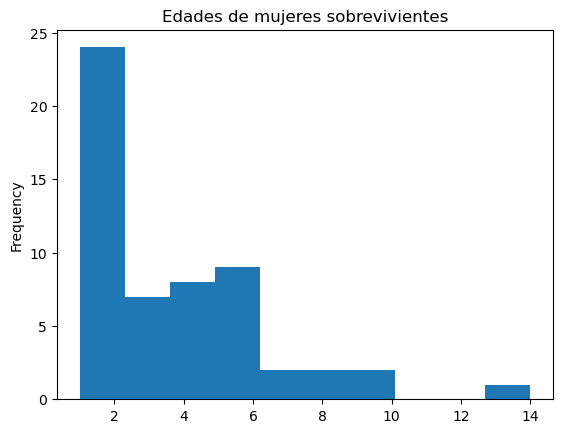

In [97]:
frecuencias = filtro['Age'].value_counts()
hist = frecuencias.plot.hist(title ='Edades de mujeres sobrevivientes')
print(frecuencias)

### El grafico anterior es simplemente para probar

# Ejercicio 3: Con GoldPrice.CSV
### 1: Crar una nueva columna que solo contenga el año, llamarla 'Year'

In [104]:
gold = pd.read_csv('goldprice.csv')
gold

,Date,Price,Open,High,Low
0,"Aug 01, 2018",1216.6,1223.40,1223.4,1216.20
1,"Jul 31, 2018",1223.7,1220.40,1228.1,1213.00
2,"Jul 30, 2018",1221.3,1222.50,1223.9,1218.10
3,"Jul 27, 2018",1222.2,1223.50,1226.8,1216.70
4,"Jul 26, 2018",1225.3,1227.80,1227.8,1227.80
...,...,...,...,...,...
9766,"Jan 03, 1980",625.0,627.00,640.0,603.00
9767,"Jan 02, 1980",575.5,562.50,577.0,558.00
9768,"Dec 31, 1979",533.6,527.88,534.5,527.88
9769,"Dec 28, 1979",517.8,516.00,517.8,510.40


In [119]:
gold2 = gold.copy() #Prefiero no modificar el CSV original
gold2['Year']=gold2['Date'].str[7:] #Es mejorable
gold2

,Date,Price,Open,High,Low,Year
0,"Aug 01, 2018",1216.6,1223.40,1223.4,1216.20,2018
1,"Jul 31, 2018",1223.7,1220.40,1228.1,1213.00,2018
2,"Jul 30, 2018",1221.3,1222.50,1223.9,1218.10,2018
3,"Jul 27, 2018",1222.2,1223.50,1226.8,1216.70,2018
4,"Jul 26, 2018",1225.3,1227.80,1227.8,1227.80,2018
...,...,...,...,...,...,...
9766,"Jan 03, 1980",625.0,627.00,640.0,603.00,1980
9767,"Jan 02, 1980",575.5,562.50,577.0,558.00,1980
9768,"Dec 31, 1979",533.6,527.88,534.5,527.88,1979
9769,"Dec 28, 1979",517.8,516.00,517.8,510.40,1979


In [128]:
gold2['Date'].str[-4:]
# Esta es otra forma de ir por los ultimos elementos (se me ocurrio ahora)

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
9766    1980
9767    1980
9768    1979
9769    1979
9770    1979
Name: Date, Length: 9771, dtype: object

### 2: Determinar le promedio de precios del oro por año

In [139]:
g_prom=gold2.groupby('Year')['Price'].mean()
g_prom

Year
1979     522.300000
1980     611.959921
1981     458.490514
1982     375.563745
1983     423.452964
1984     360.656522
1985     317.517460
1986     368.330677
1987     447.056522
1988     437.059524
1989     382.072222
1990     383.798016
1991     362.462698
1992     343.773333
1993     360.171260
1994     384.077689
1995     384.484585
1996     387.891304
1997     331.435317
1998     294.214343
1999     278.890000
2000     278.885141
2001     271.068826
2002     310.479032
2003     363.620884
2004     409.579839
2005     445.112749
2006     603.977381
2007     697.005159
2008     870.982609
2009     974.149206
2010    1227.501984
2011    1572.135714
2012    1669.157143
2013    1407.275781
2014    1265.730534
2015    1160.310227
2016    1248.176604
2017    1257.635303
2018    1305.352258
Name: Price, dtype: float64

### 3: Graficar el promedio del valor del oro por año con un grafico de barras

<Axes: xlabel='Year'>

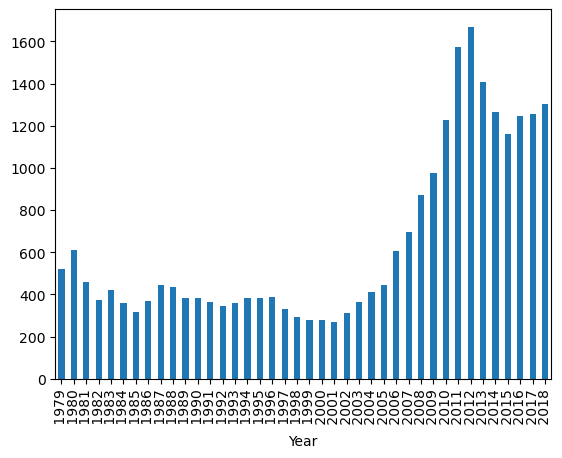

In [134]:
g_prom.plot.bar()

### Calcular el año con mayor promedio y el año con menor promedio

In [147]:
indx_min = g_prom.idxmin()
val_min = g_prom.min()
indx_max= g_prom.idxmax()
val_max= g_prom.max()
print(f'El año {indx_min} tuvo un precio promedio de {val_min} el más bajo historico')
print(f'El año {indx_max} tuvo un precio promedio de {val_max} el más alto historico')


El año  2001 tuvo un precio promedio de 271.0688259109312 el más bajo historico
El año  2012 tuvo un precio promedio de 1669.1571428571428 el más alto historico
